### Project Title: House Price Prediction

This project aims to predict house prices using a dataset containing 81 features and 1460 entries. The features include both numerical and categorical variables such as lot size, year built, neighborhood, and overall condition. The target variable, 'SalePrice,' represents the house prices. The goal is to apply machine learning models to predict 'SalePrice' based on these features, while handling missing data, encoding categorical variables, and scaling numerical ones.

In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder, OneHotEncoder, StandardScaler, FunctionTransformer
from sklearn.model_selection import train_test_split,GridSearchCV
from sklearn.tree import DecisionTreeRegressor, plot_tree
from sklearn.linear_model import LinearRegression
from sklearn import tree
from sklearn.metrics import mean_squared_error,mean_absolute_error,r2_score,accuracy_score,confusion_matrix,classification_report,f1_score
from sklearn.ensemble import RandomForestRegressor
from sklearn.pipeline import Pipeline
from sklearn.svm import SVR
from sklearn.neighbors import KNeighborsRegressor
from sklearn.feature_selection import RFE
import warnings
warnings.filterwarnings("ignore")


In [3]:
df = pd.read_csv("house_price.csv")
df

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,1456,60,RL,62.0,7917,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,8,2007,WD,Normal,175000
1456,1457,20,RL,85.0,13175,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,MnPrv,NaN,0,2,2010,WD,Normal,210000
1457,1458,70,RL,66.0,9042,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,GdPrv,Shed,2500,5,2010,WD,Normal,266500
1458,1459,20,RL,68.0,9717,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,4,2010,WD,Normal,142125


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

In [5]:
df["SaleType"].unique()

array(['WD', 'New', 'COD', 'ConLD', 'ConLI', 'CWD', 'ConLw', 'Con', 'Oth'],
      dtype=object)

In [6]:
# Scaling Numerical Columns in df before Outliers removal and Function Transformer

for col in df.columns:
    if df[col].dtype == 'object':  # Check if column is categorical
        continue  # Skip categorical columns
    df[[col]] = StandardScaler().fit_transform(df[[col]])


In [7]:
# Label Encoding Categorical Columns in df before Outliers removal and Function Transformer

for col in df.columns:
    if df[col].dtypes == "object" or df[col].dtype.name == "category":
        df[col] = LabelEncoder().fit_transform(df[col])
df.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,-1.730865,0.073375,3,-0.208034,-0.207142,1,2,3,3,0,...,-0.068692,3,4,4,-0.087688,-1.599111,0.138777,8,4,0.347273
1,-1.728492,-0.872563,3,0.409895,-0.091886,1,2,3,3,0,...,-0.068692,3,4,4,-0.087688,-0.489110,-0.614439,8,4,0.007288
2,-1.726120,0.073375,3,-0.084449,0.073480,1,2,0,3,0,...,-0.068692,3,4,4,-0.087688,0.990891,0.138777,8,4,0.536154
3,-1.723747,0.309859,3,-0.414011,-0.096897,1,2,0,3,0,...,-0.068692,3,4,4,-0.087688,-1.599111,-1.367655,8,0,-0.515281
4,-1.721374,0.073375,3,0.574676,0.375148,1,2,0,3,0,...,-0.068692,3,4,4,-0.087688,2.100892,0.138777,8,4,0.869843


In [8]:
df["SaleType"].unique()

array([8, 6, 0, 3, 4, 1, 5, 2, 7])

In [9]:
# columns contains less than 50% non_null values  

Columns = ["Alley", "PoolQC", "Fence", "FireplaceQu", "MasVnrType", "MiscFeature"]

In [10]:
cols = ["Alley", "PoolQC", "Fence", "FireplaceQu", "MasVnrType", "MiscFeature", "SalePrice"]

In [11]:
correlation = df[cols].corr()
correlation

,Alley,PoolQC,Fence,FireplaceQu,MasVnrType,MiscFeature,SalePrice
Alley,1.000000,-0.015492,0.021124,-0.076354,-0.137123,0.021856,0.139868
PoolQC,-0.015492,1.000000,0.141977,0.071251,-0.002429,0.011980,-0.126070
Fence,0.021124,0.141977,1.000000,-0.043041,-0.017240,0.100305,0.140640
FireplaceQu,-0.076354,0.071251,-0.043041,1.000000,0.128966,-0.069178,-0.459605
MasVnrType,-0.137123,-0.002429,-0.017240,0.128966,1.000000,-0.047781,-0.281554
MiscFeature,0.021856,0.011980,0.100305,-0.069178,-0.047781,1.000000,0.073609
SalePrice,0.139868,-0.126070,0.140640,-0.459605,-0.281554,0.073609,1.000000


##### Correlation values of specific columns with SalePrice

In [12]:
print(correlation["SalePrice"].sort_values(ascending = True))

FireplaceQu   -0.459605
MasVnrType    -0.281554
PoolQC        -0.126070
MiscFeature    0.073609
Alley          0.139868
Fence          0.140640
SalePrice      1.000000
Name: SalePrice, dtype: float64


##### Keep: FireplaceQu, MasVnrType (due to their strongest (negative) correlation with SalePrice).
##### Drop: Alley, PoolQC, Fence, MiscFeature (due to weak correlation and missing values).

In [13]:
df.drop(columns=["Id", "Alley", "PoolQC", "Fence", "MiscFeature"], axis = 1, inplace=True) 

In [14]:
df = df.apply(lambda x: x.fillna(x.mode()[0]) if x.dtype == "object" else x)

In [15]:
df = df.apply(lambda x: x.fillna(x.mean()) if x.dtype == "float64" else x)

In [16]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 76 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   MSSubClass     1460 non-null   float64
 1   MSZoning       1460 non-null   int32  
 2   LotFrontage    1460 non-null   float64
 3   LotArea        1460 non-null   float64
 4   Street         1460 non-null   int32  
 5   LotShape       1460 non-null   int32  
 6   LandContour    1460 non-null   int32  
 7   Utilities      1460 non-null   int32  
 8   LotConfig      1460 non-null   int32  
 9   LandSlope      1460 non-null   int32  
 10  Neighborhood   1460 non-null   int32  
 11  Condition1     1460 non-null   int32  
 12  Condition2     1460 non-null   int32  
 13  BldgType       1460 non-null   int32  
 14  HouseStyle     1460 non-null   int32  
 15  OverallQual    1460 non-null   float64
 16  OverallCond    1460 non-null   float64
 17  YearBuilt      1460 non-null   float64
 18  YearRemo

### Detecting Outliers in "SalePrice" column

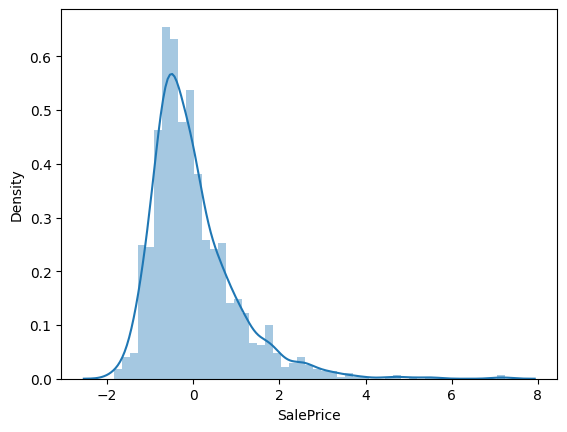

In [17]:
sns.distplot(df["SalePrice"])
plt.show()

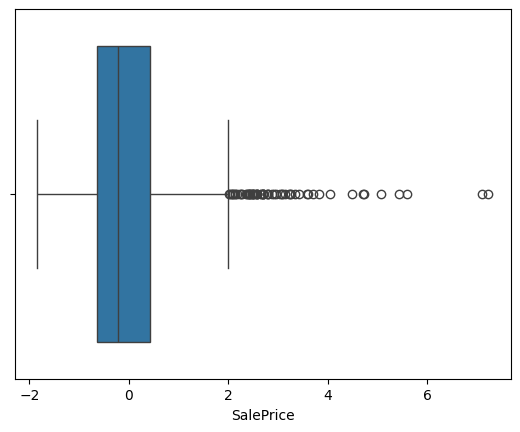

In [18]:
sns.boxplot(x = "SalePrice", data= df)
plt.show()

In [19]:
df.head(3)

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,LotShape,LandContour,Utilities,LotConfig,LandSlope,...,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,0.073375,3,-0.208034,-0.207142,1,3,3,0,4,0,...,-0.359325,-0.116339,-0.270208,-0.068692,-0.087688,-1.599111,0.138777,8,4,0.347273
1,-0.872563,3,0.409895,-0.091886,1,3,3,0,2,0,...,-0.359325,-0.116339,-0.270208,-0.068692,-0.087688,-0.489110,-0.614439,8,4,0.007288
2,0.073375,3,-0.084449,0.073480,1,0,3,0,4,0,...,-0.359325,-0.116339,-0.270208,-0.068692,-0.087688,0.990891,0.138777,8,4,0.536154


### Removing outliers from "SalePrice" column using IQR method

In [20]:
q1 = df["SalePrice"].quantile(0.25)
q3 = df["SalePrice"].quantile(0.75)
q1, q3

(-0.6415161951869481, 0.416529402889374)

In [21]:
IQR = q3 - q1

In [22]:
min_rng_sp = q1 - (1.5*IQR)
max_rng_sp = q3 + (1.5*IQR)
min_rng_sp, max_rng_sp

(-2.2285845923014316, 2.003597800003857)

In [23]:
new_df = df[(df["SalePrice"]>=min_rng_sp) & (df["SalePrice"]<=max_rng_sp)]
new_df


,MSSubClass,MSZoning,LotFrontage,LotArea,Street,LotShape,LandContour,Utilities,LotConfig,LandSlope,...,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,0.073375,3,-0.208034,-0.207142,1,3,3,0,4,0,...,-0.359325,-0.116339,-0.270208,-0.068692,-0.087688,-1.599111,0.138777,8,4,0.347273
1,-0.872563,3,0.409895,-0.091886,1,3,3,0,2,0,...,-0.359325,-0.116339,-0.270208,-0.068692,-0.087688,-0.489110,-0.614439,8,4,0.007288
2,0.073375,3,-0.084449,0.073480,1,0,3,0,4,0,...,-0.359325,-0.116339,-0.270208,-0.068692,-0.087688,0.990891,0.138777,8,4,0.536154
3,0.309859,3,-0.414011,-0.096897,1,0,3,0,0,0,...,4.092524,-0.116339,-0.270208,-0.068692,-0.087688,-1.599111,-1.367655,8,0,-0.515281
4,0.073375,3,0.574676,0.375148,1,0,3,0,2,0,...,-0.359325,-0.116339,-0.270208,-0.068692,-0.087688,2.100892,0.138777,8,4,0.869843
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,0.073375,3,-0.331620,-0.260560,1,3,3,0,4,0,...,-0.359325,-0.116339,-0.270208,-0.068692,-0.087688,0.620891,-0.614439,8,4,-0.074560
1456,-0.872563,3,0.615871,0.266407,1,3,3,0,4,0,...,-0.359325,-0.116339,-0.270208,-0.068692,-0.087688,-1.599111,1.645210,8,4,0.366161
1457,0.309859,3,-0.166839,-0.147810,1,3,3,0,4,0,...,-0.359325,-0.116339,-0.270208,-0.068692,4.953112,-0.489110,1.645210,8,4,1.077611
1458,-0.872563,3,-0.084449,-0.080160,1,3,3,0,4,0,...,1.473789,-0.116339,-0.270208,-0.068692,-0.087688,-0.859110,1.645210,8,4,-0.488523


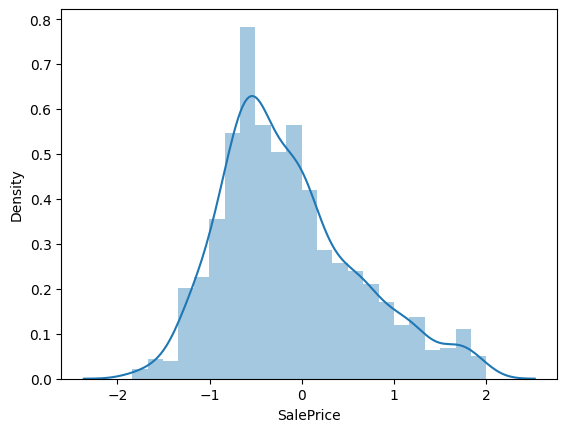

In [24]:
sns.distplot(new_df["SalePrice"])

plt.show()

In [25]:
new_df.isnull().sum()

MSSubClass       0
MSZoning         0
LotFrontage      0
LotArea          0
Street           0
                ..
MoSold           0
YrSold           0
SaleType         0
SaleCondition    0
SalePrice        0
Length: 76, dtype: int64

### Function Transformation (using Func = np.log1p)
##### After removing Outliers  

In [26]:
ft = FunctionTransformer(func = np.log1p)

In [27]:
ft.fit(new_df[["SalePrice"]])

FunctionTransformer(func=<ufunc 'log1p'>)

In [28]:
new_df["SalePrice_tf"] = ft.transform(df[["SalePrice"]])
new_df

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,LotShape,LandContour,Utilities,LotConfig,LandSlope,...,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice,SalePrice_tf
0,0.073375,3,-0.208034,-0.207142,1,3,3,0,4,0,...,-0.116339,-0.270208,-0.068692,-0.087688,-1.599111,0.138777,8,4,0.347273,0.298083
1,-0.872563,3,0.409895,-0.091886,1,3,3,0,2,0,...,-0.116339,-0.270208,-0.068692,-0.087688,-0.489110,-0.614439,8,4,0.007288,0.007262
2,0.073375,3,-0.084449,0.073480,1,0,3,0,4,0,...,-0.116339,-0.270208,-0.068692,-0.087688,0.990891,0.138777,8,4,0.536154,0.429282
3,0.309859,3,-0.414011,-0.096897,1,0,3,0,0,0,...,-0.116339,-0.270208,-0.068692,-0.087688,-1.599111,-1.367655,8,0,-0.515281,-0.724186
4,0.073375,3,0.574676,0.375148,1,0,3,0,2,0,...,-0.116339,-0.270208,-0.068692,-0.087688,2.100892,0.138777,8,4,0.869843,0.625854
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,0.073375,3,-0.331620,-0.260560,1,3,3,0,4,0,...,-0.116339,-0.270208,-0.068692,-0.087688,0.620891,-0.614439,8,4,-0.074560,-0.077486
1456,-0.872563,3,0.615871,0.266407,1,3,3,0,4,0,...,-0.116339,-0.270208,-0.068692,-0.087688,-1.599111,1.645210,8,4,0.366161,0.312005
1457,0.309859,3,-0.166839,-0.147810,1,3,3,0,4,0,...,-0.116339,-0.270208,-0.068692,4.953112,-0.489110,1.645210,8,4,1.077611,0.731219
1458,-0.872563,3,-0.084449,-0.080160,1,3,3,0,4,0,...,-0.116339,-0.270208,-0.068692,-0.087688,-0.859110,1.645210,8,4,-0.488523,-0.670453


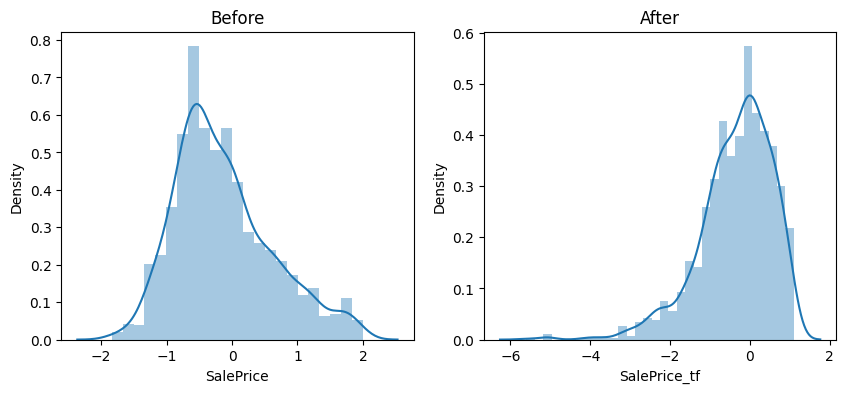

In [29]:
plt.figure(figsize = (10,4))
plt.subplot(1,2,1)
plt.title("Before")
sns.distplot(new_df["SalePrice"])

plt.subplot(1,2,2)
plt.title("After")
sns.distplot(new_df["SalePrice_tf"])

plt.show()           

In [30]:
new_df

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,LotShape,LandContour,Utilities,LotConfig,LandSlope,...,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice,SalePrice_tf
0,0.073375,3,-0.208034,-0.207142,1,3,3,0,4,0,...,-0.116339,-0.270208,-0.068692,-0.087688,-1.599111,0.138777,8,4,0.347273,0.298083
1,-0.872563,3,0.409895,-0.091886,1,3,3,0,2,0,...,-0.116339,-0.270208,-0.068692,-0.087688,-0.489110,-0.614439,8,4,0.007288,0.007262
2,0.073375,3,-0.084449,0.073480,1,0,3,0,4,0,...,-0.116339,-0.270208,-0.068692,-0.087688,0.990891,0.138777,8,4,0.536154,0.429282
3,0.309859,3,-0.414011,-0.096897,1,0,3,0,0,0,...,-0.116339,-0.270208,-0.068692,-0.087688,-1.599111,-1.367655,8,0,-0.515281,-0.724186
4,0.073375,3,0.574676,0.375148,1,0,3,0,2,0,...,-0.116339,-0.270208,-0.068692,-0.087688,2.100892,0.138777,8,4,0.869843,0.625854
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,0.073375,3,-0.331620,-0.260560,1,3,3,0,4,0,...,-0.116339,-0.270208,-0.068692,-0.087688,0.620891,-0.614439,8,4,-0.074560,-0.077486
1456,-0.872563,3,0.615871,0.266407,1,3,3,0,4,0,...,-0.116339,-0.270208,-0.068692,-0.087688,-1.599111,1.645210,8,4,0.366161,0.312005
1457,0.309859,3,-0.166839,-0.147810,1,3,3,0,4,0,...,-0.116339,-0.270208,-0.068692,4.953112,-0.489110,1.645210,8,4,1.077611,0.731219
1458,-0.872563,3,-0.084449,-0.080160,1,3,3,0,4,0,...,-0.116339,-0.270208,-0.068692,-0.087688,-0.859110,1.645210,8,4,-0.488523,-0.670453


In [31]:
new_df.isnull().sum()

MSSubClass         0
MSZoning           0
LotFrontage        0
LotArea            0
Street             0
                ... 
YrSold             0
SaleType           0
SaleCondition      0
SalePrice          0
SalePrice_tf     124
Length: 77, dtype: int64

In [32]:
new_df.drop(columns="SalePrice", inplace=True)

In [33]:
new_df["SalePrice_tf"].fillna(new_df["SalePrice_tf"].mean(), inplace=True)

In [34]:
new_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1399 entries, 0 to 1459
Data columns (total 76 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   MSSubClass     1399 non-null   float64
 1   MSZoning       1399 non-null   int32  
 2   LotFrontage    1399 non-null   float64
 3   LotArea        1399 non-null   float64
 4   Street         1399 non-null   int32  
 5   LotShape       1399 non-null   int32  
 6   LandContour    1399 non-null   int32  
 7   Utilities      1399 non-null   int32  
 8   LotConfig      1399 non-null   int32  
 9   LandSlope      1399 non-null   int32  
 10  Neighborhood   1399 non-null   int32  
 11  Condition1     1399 non-null   int32  
 12  Condition2     1399 non-null   int32  
 13  BldgType       1399 non-null   int32  
 14  HouseStyle     1399 non-null   int32  
 15  OverallQual    1399 non-null   float64
 16  OverallCond    1399 non-null   float64
 17  YearBuilt      1399 non-null   float64
 18  YearRemodAdd 

In [35]:
new_df.head()

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,LotShape,LandContour,Utilities,LotConfig,LandSlope,...,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice_tf
0,0.073375,3,-0.208034,-0.207142,1,3,3,0,4,0,...,-0.359325,-0.116339,-0.270208,-0.068692,-0.087688,-1.599111,0.138777,8,4,0.298083
1,-0.872563,3,0.409895,-0.091886,1,3,3,0,2,0,...,-0.359325,-0.116339,-0.270208,-0.068692,-0.087688,-0.489110,-0.614439,8,4,0.007262
2,0.073375,3,-0.084449,0.073480,1,0,3,0,4,0,...,-0.359325,-0.116339,-0.270208,-0.068692,-0.087688,0.990891,0.138777,8,4,0.429282
3,0.309859,3,-0.414011,-0.096897,1,0,3,0,0,0,...,4.092524,-0.116339,-0.270208,-0.068692,-0.087688,-1.599111,-1.367655,8,0,-0.724186
4,0.073375,3,0.574676,0.375148,1,0,3,0,2,0,...,-0.359325,-0.116339,-0.270208,-0.068692,-0.087688,2.100892,0.138777,8,4,0.625854


In [36]:
new_df.columns

Index(['MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea', 'Street',
       'LotShape', 'LandContour', 'Utilities', 'LotConfig', 'LandSlope',
       'Neighborhood', 'Condition1', 'Condition2', 'BldgType', 'HouseStyle',
       'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd', 'RoofStyle',
       'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType', 'MasVnrArea',
       'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual', 'BsmtCond',
       'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1', 'BsmtFinType2',
       'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'Heating', 'HeatingQC',
       'CentralAir', 'Electrical', '1stFlrSF', '2ndFlrSF', 'LowQualFinSF',
       'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath', 'HalfBath',
       'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual', 'TotRmsAbvGrd',
       'Functional', 'Fireplaces', 'FireplaceQu', 'GarageType', 'GarageYrBlt',
       'GarageFinish', 'GarageCars', 'GarageArea', 'GarageQual', 'GarageCond',
       'PavedDrive', 'WoodDeckSF'

In [37]:
new_df.shape

(1399, 76)

##### Correlation values of specific columns with SalePrice

In [38]:
print(correlation["SalePrice"].sort_values(ascending = False))

SalePrice      1.000000
Fence          0.140640
Alley          0.139868
MiscFeature    0.073609
PoolQC        -0.126070
MasVnrType    -0.281554
FireplaceQu   -0.459605
Name: SalePrice, dtype: float64


In [38]:
#Keep: FireplaceQu, MasVnrType (due to their strongest (negative) correlation with SalePrice)

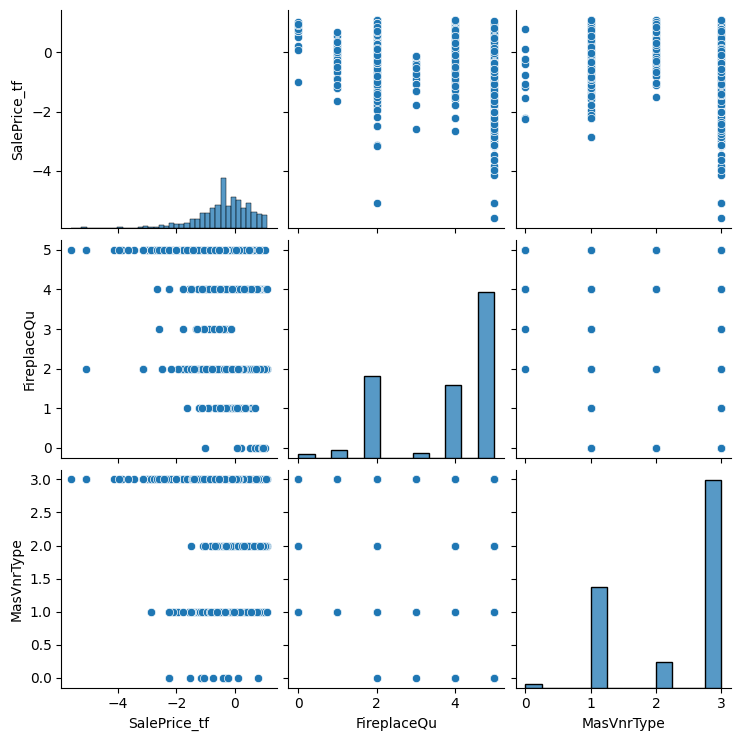

In [39]:
# Visualizing relationship using a pairplot

sns.pairplot(new_df[["SalePrice_tf", "FireplaceQu", "MasVnrType"]])
plt.show()


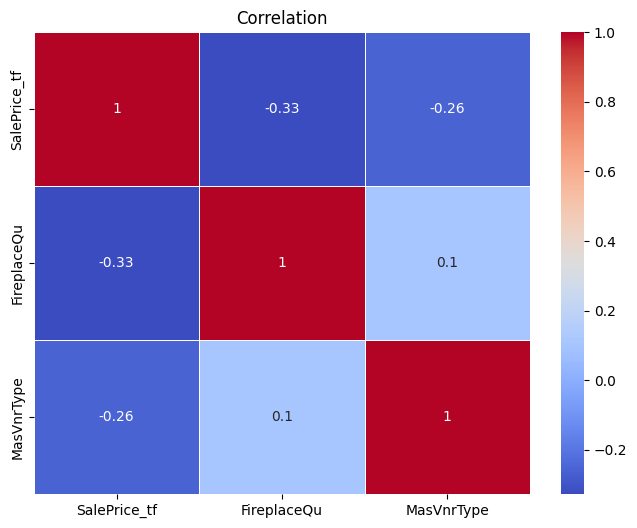

In [40]:
plt.figure(figsize=(8,6))
sns.heatmap(new_df[["SalePrice_tf", "FireplaceQu", "MasVnrType"]].corr(), annot=True, cmap="coolwarm", linewidths=0.5)
plt.title("Correlation")
plt.show()

In [41]:
new_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1399 entries, 0 to 1459
Data columns (total 76 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   MSSubClass     1399 non-null   float64
 1   MSZoning       1399 non-null   int32  
 2   LotFrontage    1399 non-null   float64
 3   LotArea        1399 non-null   float64
 4   Street         1399 non-null   int32  
 5   LotShape       1399 non-null   int32  
 6   LandContour    1399 non-null   int32  
 7   Utilities      1399 non-null   int32  
 8   LotConfig      1399 non-null   int32  
 9   LandSlope      1399 non-null   int32  
 10  Neighborhood   1399 non-null   int32  
 11  Condition1     1399 non-null   int32  
 12  Condition2     1399 non-null   int32  
 13  BldgType       1399 non-null   int32  
 14  HouseStyle     1399 non-null   int32  
 15  OverallQual    1399 non-null   float64
 16  OverallCond    1399 non-null   float64
 17  YearBuilt      1399 non-null   float64
 18  YearRemodAdd 

In [42]:
# Splitting data in to Independent & Dependent Variable

x = new_df.drop(columns=["SalePrice_tf"])  # Features
y = new_df["SalePrice_tf"] # Target

x.shape, y.shape

((1399, 75), (1399,))

In [43]:
x_train, x_test, y_train, y_test = train_test_split(x,y, test_size=0.2, random_state=42)

## Create Pipeline For Each Models

##### a. Linear Regression with RFE(Recursive Feature Elimination)

In [44]:
lr_pipeline = Pipeline([("feature_selection", RFE(estimator=LinearRegression(), n_features_to_select=15)),
                    ("reg", LinearRegression())
                   ])

##### b. Decision Tree Regressor with RFE

In [45]:
dt_pipeline = Pipeline([("feature_selection", RFE(estimator=DecisionTreeRegressor(), n_features_to_select=15)),
                ("reg", DecisionTreeRegressor())
                ])

##### c. Random Forest Regressor without RFE

In [46]:
rf_pipeline = Pipeline([("reg", RandomForestRegressor())])

## Hyperparameter Tuning using GridSearchCV

In [47]:
param_grid_lr = {"feature_selection__n_features_to_select":[5,10,15,20]}  

param_grid_dt = {"feature_selection__n_features_to_select":[5,10,15,20],
                 "reg__criterion":["squared_error", "absolute_error","poisson"],
                 "reg__max_depth":[None,5,10,15],
                 "reg__min_samples_split":[2,5,10],
                 "reg__min_samples_leaf":[1,2,4]}

param_grid_rf = {"reg__n_estimators":[50,100,200,300],
                 "reg__max_depth":[None,5,10,15],
                 "reg__min_samples_split":[2,5,10],
                 "reg__min_samples_leaf":[1,2,4]}


In [48]:
# Linear Regression

grid_search_lr = GridSearchCV(lr_pipeline, param_grid_lr, cv=5, scoring="r2")
grid_search_lr.fit(x_train, y_train)



GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('feature_selection',
                                        RFE(estimator=LinearRegression(),
                                            n_features_to_select=15)),
                                       ('reg', LinearRegression())]),
             param_grid={'feature_selection__n_features_to_select': [5, 10, 15,
                                                                     20]},
             scoring='r2')

### Plot Actual vs Predicted Values

In [49]:
print("Best Parameters:", grid_search_lr.best_params_)
print("Best R^2 Scores:", grid_search_lr.best_score_)

Best Parameters: {'feature_selection__n_features_to_select': 15}
Best R^2 Scores: 0.49880315095879074


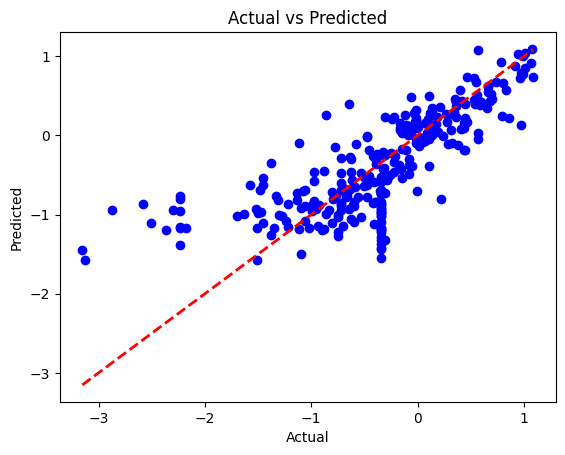

In [50]:
y_pred = grid_search_lr.predict(x_test)

# Plot actual vs predicted values

plt.scatter(y_test, y_pred, color="blue")
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--', lw=2)
plt.xlabel("Actual")
plt.ylabel("Predicted")
plt.title("Actual vs Predicted")
plt.show()

This shows how well the model's predictions align with the true values

### Residual PLot

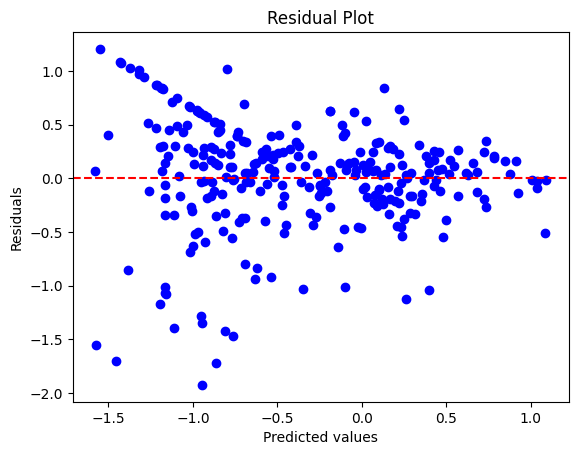

In [51]:
# calculate the residuals

residuals = y_test - y_pred

# plot residuals

plt.scatter(y_pred, residuals, color="blue")
plt.axhline(y=0, color="red", linestyle="--")
plt.xlabel("Predicted values")
plt.ylabel("Residuals")
plt.title("Residual Plot")
plt.show()            

Residuals are the difference between the actual values and the predicted values. A residual plot helps identify patterns that the model might be missing.

### Distribution of Residuals (Histogram)


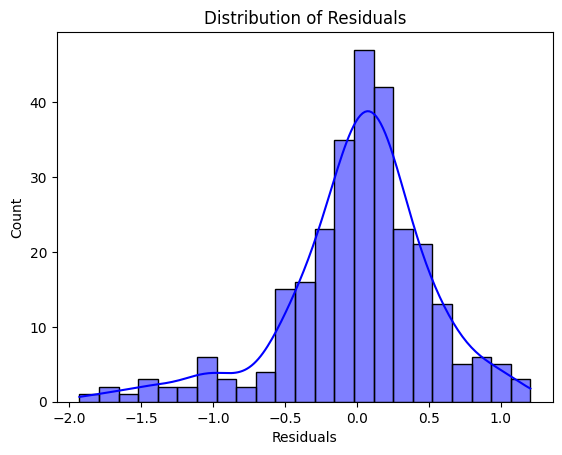

In [52]:
sns.histplot(residuals, kde=True, color="blue")
plt.xlabel("Residuals")
plt.title("Distribution of Residuals")
plt.show()

These plots will help you visually assess whether the model's predictions are accurate or if there is a need for improvement 

In [53]:
grid_search_rf = GridSearchCV(rf_pipeline, param_grid_rf, cv=5, scoring="r2")
grid_search_rf.fit(x_train, y_train)

GridSearchCV(cv=5, estimator=Pipeline(steps=[('reg', RandomForestRegressor())]),
             param_grid={'reg__max_depth': [None, 5, 10, 15],
                         'reg__min_samples_leaf': [1, 2, 4],
                         'reg__min_samples_split': [2, 5, 10],
                         'reg__n_estimators': [50, 100, 200, 300]},
             scoring='r2')

In [54]:
print("Best Parameters:", grid_search_rf.best_params_)
print("Best R^2 Scores:", grid_search_rf.best_score_)

Best Parameters: {'reg__max_depth': 15, 'reg__min_samples_leaf': 2, 'reg__min_samples_split': 5, 'reg__n_estimators': 100}
Best R^2 Scores: 0.6172055350841034


In [58]:
# Train a Random Forest Classifier on the training set using the best hyperparameters

rf = grid_search_rf.best_estimator_.named_steps["reg"]
rf.fit(x_train,y_train)

RandomForestRegressor(max_depth=15, min_samples_leaf=2, min_samples_split=5)

In [59]:
# make predictions on the test data

y_pred = rf.predict(x_test)
y_pred

array([-0.74207616, -0.76633018, -0.08135874, -0.77365163, -1.00640643,
        0.8223885 ,  0.14861796, -0.7562278 , -0.93600079,  0.56915379,
        0.8673223 , -0.68412175, -1.76635251,  0.81147918,  0.25363512,
        0.11974696, -0.0546165 , -0.89297526, -1.25728653, -0.29502891,
       -1.26535836,  0.20288453,  0.38250096, -0.84351696, -0.18932909,
       -0.99609229,  0.71292565, -0.74350113, -1.04119464, -1.14144676,
        0.1418747 ,  0.77286919,  0.50613305,  0.43746709, -0.1424329 ,
       -0.77656643, -0.66302469,  0.50191839, -0.05186018,  0.93283579,
        0.70758044, -1.06300069,  0.93731281, -0.88484396, -0.49688453,
       -0.0401064 , -0.06376176, -1.02030317, -1.20438006, -1.34120326,
       -1.20975362, -0.74799202, -0.54167417, -0.47488254,  0.59912474,
       -0.47015205, -0.8448068 , -0.72344602, -1.39115107, -0.96225943,
       -0.38668315, -0.53005275,  0.60358904, -1.20388653, -0.0596952 ,
        0.59231459,  0.79148567, -0.00871695, -0.54903216, -0.01

In [62]:
# Evaluate the accuracy of the model

print("Accuracy:", r2_score(y_test, y_pred))

print("Accuracy:", mean_squared_error(y_test, y_pred))

print("Accuracy:", mean_absolute_error(y_test, y_pred))

Accuracy: 0.617736423557209
Accuracy: 0.2350430488163393
Accuracy: 0.31784383649450026


In [63]:
feature_importances = rf.feature_importances_
print("feature_importances")
for i, feature in enumerate(x.columns):
    print(f"{feature}:{feature_importances[i]}") 

feature_importances
MSSubClass:0.006232080753561553
MSZoning:0.011388945999338297
LotFrontage:0.009069676144506942
LotArea:0.031125796820572548
Street:0.0
LotShape:0.0021194273141533133
LandContour:0.0012508153776885477
Utilities:0.0
LotConfig:0.004039291512933616
LandSlope:0.0010141285933643264
Neighborhood:0.0123938364269963
Condition1:0.0033242596303507507
Condition2:0.0
BldgType:0.0010643971420788412
HouseStyle:0.0030036474211369356
OverallQual:0.37054065419990406
OverallCond:0.006020902513544531
YearBuilt:0.029381940897381775
YearRemodAdd:0.017233026292415313
RoofStyle:0.0009176076803080889
RoofMatl:2.340357276284281e-05
Exterior1st:0.004913015934983527
Exterior2nd:0.0044144359653686144
MasVnrType:0.000422922366338294
MasVnrArea:0.002346443851835118
ExterQual:0.004202161957332688
ExterCond:0.001952339105844244
Foundation:0.008764349186435863
BsmtQual:0.0056576398024917735
BsmtCond:0.0026212945102839294
BsmtExposure:0.002309474562146692
BsmtFinType1:0.0055891523274602456
BsmtFinSF1

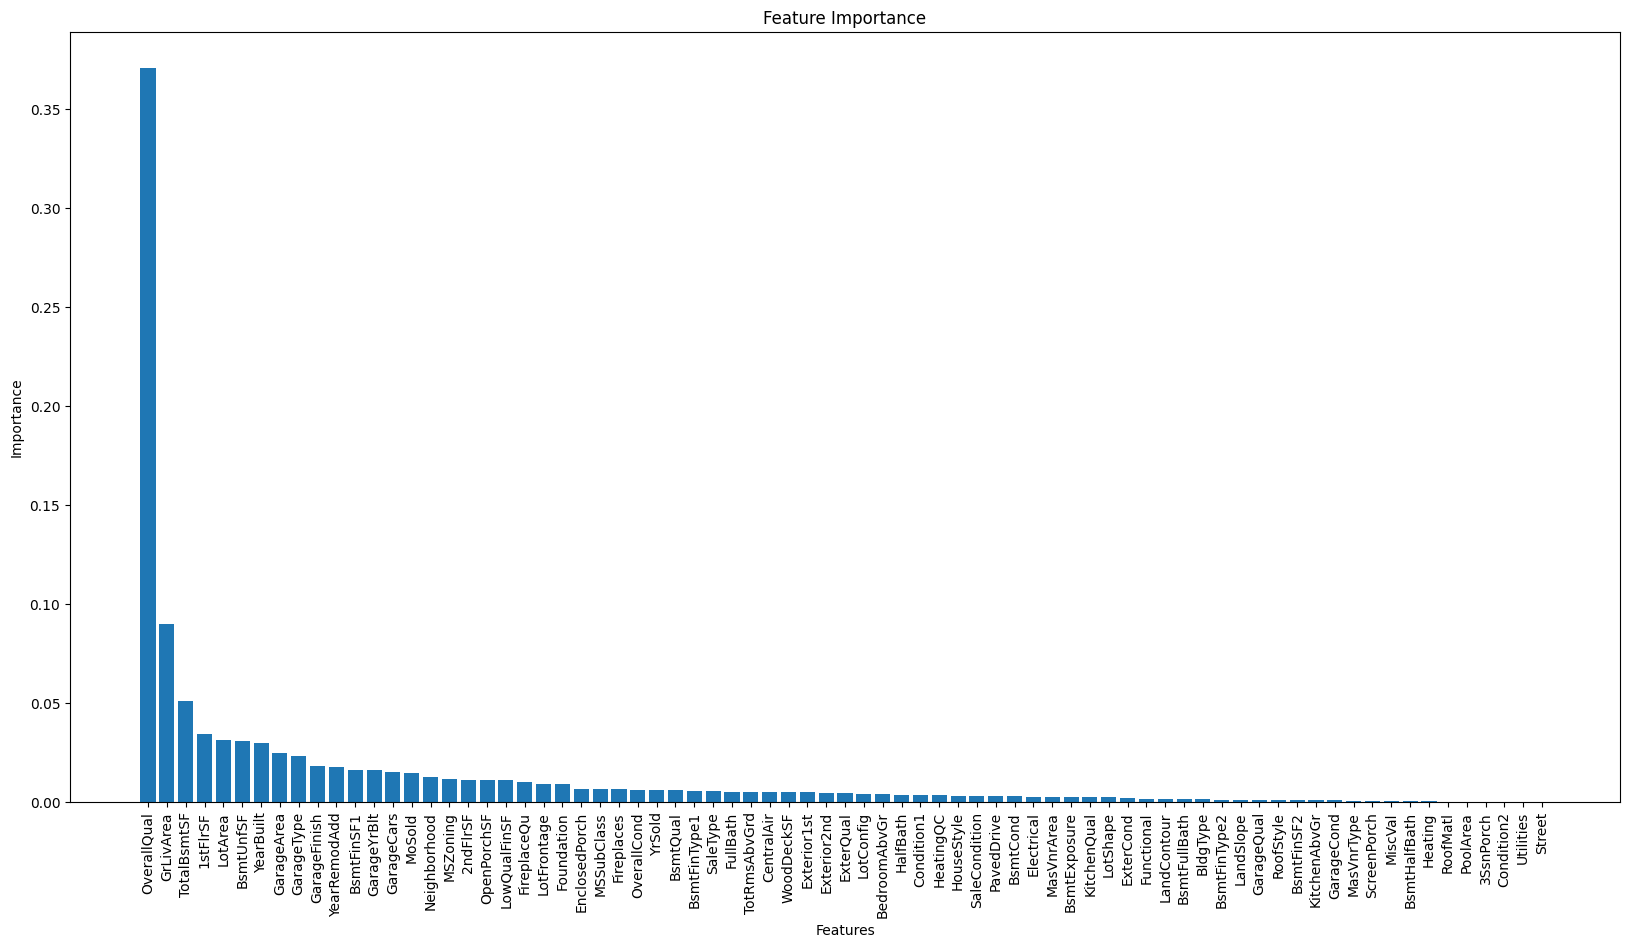

In [69]:
# Plot the Feature Importances

plt.figure(figsize=(20,10))
indices = np.argsort(feature_importances)[::-1]
plt.bar(x.columns[indices], feature_importances[indices])
plt.xticks(rotation=90)
plt.title("Feature Importance")
plt.xlabel("Features")
plt.ylabel("Importance")
plt.show()